### Análisis Exploratorio de Datos

https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset/version/1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
spotify_songs = pd.read_csv('./Datasets/Spotify-2000.csv')
spotify_songs.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [4]:
print(spotify_songs.shape)

(1994, 15)


In [5]:
spotify_songs.size

29910

In [6]:
spotify_songs.count()

Index                     1994
Title                     1994
Artist                    1994
Top Genre                 1994
Year                      1994
Beats Per Minute (BPM)    1994
Energy                    1994
Danceability              1994
Loudness (dB)             1994
Liveness                  1994
Valence                   1994
Length (Duration)         1994
Acousticness              1994
Speechiness               1994
Popularity                1994
dtype: int64

* Analizando propiedades del set

In [7]:
genres = spotify_songs['Top Genre']

In [8]:
type(genres)

pandas.core.series.Series

In [9]:
genres.value_counts()

album rock          413
adult standards     123
dutch pop            88
alternative rock     86
dance pop            83
                   ... 
bebop                 1
pop punk              1
diva house            1
la pop                1
happy hardcore        1
Name: Top Genre, Length: 149, dtype: int64

In [10]:
artists = spotify_songs['Artist']
artists.value_counts()

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
                      ..
Manu Chao              1
Gloria Gaynor          1
Diesel                 1
Paul Kalkbrenner       1
Dido                   1
Name: Artist, Length: 731, dtype: int64

* Análisis sobre géneros musicales

In [11]:
genres_counts = genres.value_counts()
genres_with_one_song = genres_counts[genres_counts == 1]
genres_with_one_song.count()

54

In [12]:
#Cuantos géneros musicales hay en el set
len(genres.unique())

149

* Análisis sobre artistas

In [13]:
artists_counts = artists.value_counts()
artists_with_one_song = artists_counts[artists_counts == 1]
artists_with_one_song.count()

410

In [14]:
#Cuantos artistas tiene una sola canción en el set
len(artists.unique())

731

* Análisis sobre años

In [15]:
spotify_songs['Year'].value_counts()

2008    54
2018    52
1991    52
1977    51
2002    47
        ..
1962     3
1959     3
1961     1
1960     1
1956     1
Name: Year, Length: 63, dtype: int64

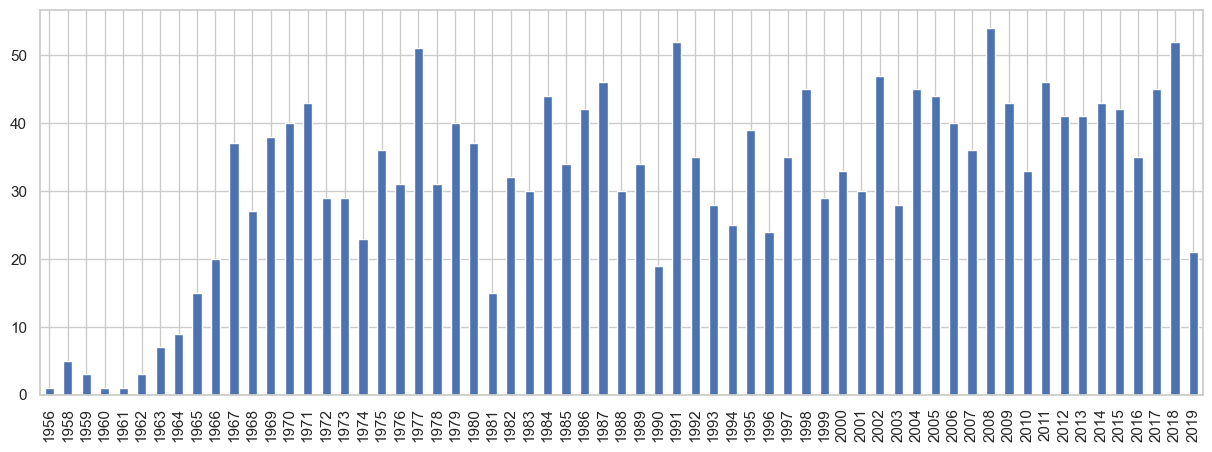

In [16]:
spotify_songs['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

* Análisis sobre BPM (beats per minute)

In [17]:
spotify_songs['Beats Per Minute (BPM)']

0       157
1       135
2       168
3       173
4       106
       ... 
1989     94
1990    175
1991    168
1992    174
1993    133
Name: Beats Per Minute (BPM), Length: 1994, dtype: int64

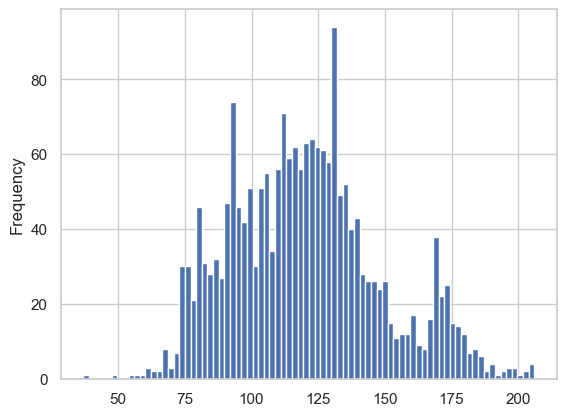

In [18]:
spotify_songs['Beats Per Minute (BPM)'].plot(kind='hist', bins=80)

* Análisis sobre el uso de memoria

In [19]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [20]:
(spotify_songs.memory_usage() / (1024)).sum()

233.796875

* Análisis sobre calidad de datos

In [21]:
spotify_songs.isnull().any()

Index                     False
Title                     False
Artist                    False
Top Genre                 False
Year                      False
Beats Per Minute (BPM)    False
Energy                    False
Danceability              False
Loudness (dB)             False
Liveness                  False
Valence                   False
Length (Duration)         False
Acousticness              False
Speechiness               False
Popularity                False
dtype: bool

In [22]:
spotify_songs.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

* Estadísticas sobre el dataframe

In [23]:
spotify_songs.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00"
mean,997.50,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,28.86,4.99,59.53
std,575.76,16.12,28.03,22.15,15.35,3.65,16.73,24.86,29.01,4.40,14.35
min,1.00,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,0.00,2.00,11.00
25%,499.25,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,3.00,3.00,49.25
50%,997.50,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,18.00,4.00,62.00
75%,"1,495.75","2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,50.00,5.00,71.00
max,"1,994.00","2,019.00",206.00,100.00,96.00,-2.00,99.00,99.00,99.00,55.00,100.00


In [24]:
#La duración de las canciones no aparece como variable numérica
#Con include='all' podemos ver las estadísticas sobre todas las columnas
spotify_songs.describe(include='all')

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,"1,994.00",1994,1994,1994,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00",1994,"1,994.00","1,994.00","1,994.00"
unique,nan,1958,731,149,nan,nan,nan,nan,nan,nan,nan,350,nan,nan,nan
top,nan,Hallelujah,Queen,album rock,nan,nan,nan,nan,nan,nan,nan,215,nan,nan,nan
freq,nan,3,37,413,nan,nan,nan,nan,nan,nan,nan,23,nan,nan,nan
mean,997.50,NaN,NaN,NaN,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,NaN,28.86,4.99,59.53
std,575.76,NaN,NaN,NaN,16.12,28.03,22.15,15.35,3.65,16.73,24.86,NaN,29.01,4.40,14.35
min,1.00,NaN,NaN,NaN,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,NaN,0.00,2.00,11.00
25%,499.25,NaN,NaN,NaN,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,NaN,3.00,3.00,49.25
50%,997.50,NaN,NaN,NaN,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,NaN,18.00,4.00,62.00
75%,"1,495.75",NaN,NaN,NaN,"2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,NaN,50.00,5.00,71.00


In [25]:
#Buscamos el tipo de Length
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [26]:
#spotify_songs['Length (Duration)'].astype('int64')
#Devuelve error

In [27]:
spotify_songs['Length (Duration)'] = spotify_songs['Length (Duration)'].str.replace(',', '').astype('int64')

In [28]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

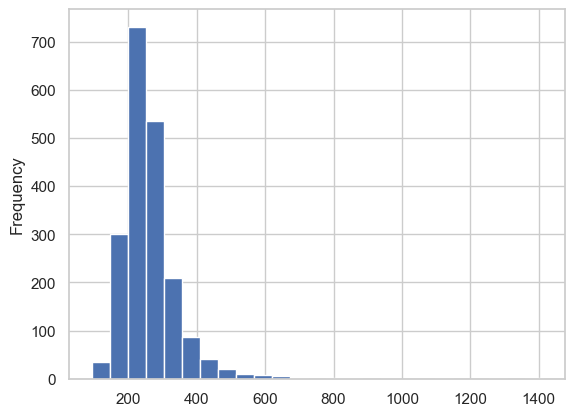

In [29]:
spotify_songs['Length (Duration)'].plot(kind='hist', bins=25)

In [30]:
spotify_songs.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00"
mean,997.50,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,262.44,28.86,4.99,59.53
std,575.76,16.12,28.03,22.15,15.35,3.65,16.73,24.86,93.60,29.01,4.40,14.35
min,1.00,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,93.00,0.00,2.00,11.00
25%,499.25,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,212.00,3.00,3.00,49.25
50%,997.50,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,245.00,18.00,4.00,62.00
75%,"1,495.75","2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,289.00,50.00,5.00,71.00
max,"1,994.00","2,019.00",206.00,100.00,96.00,-2.00,99.00,99.00,"1,412.00",99.00,55.00,100.00


#### Análisis de distribución de variables y Visualización ####

In [31]:
spotify_songs.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00"
mean,997.50,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,262.44,28.86,4.99,59.53
std,575.76,16.12,28.03,22.15,15.35,3.65,16.73,24.86,93.60,29.01,4.40,14.35
min,1.00,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,93.00,0.00,2.00,11.00
25%,499.25,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,212.00,3.00,3.00,49.25
50%,997.50,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,245.00,18.00,4.00,62.00
75%,"1,495.75","2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,289.00,50.00,5.00,71.00
max,"1,994.00","2,019.00",206.00,100.00,96.00,-2.00,99.00,99.00,"1,412.00",99.00,55.00,100.00


__Histograma__

Text(0, 0.5, 'Frecuencia')

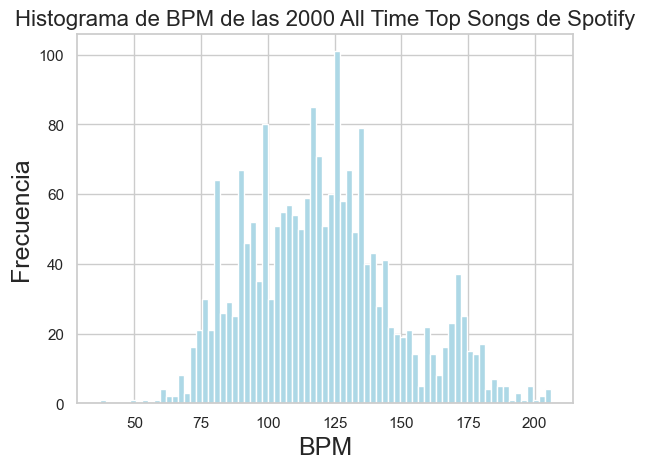

In [32]:
g = spotify_songs['Beats Per Minute (BPM)'].plot.hist(bins=75, color='lightblue')
g.set_title('Histograma de BPM de las 2000 All Time Top Songs de Spotify', fontsize=16)
g.set_xlabel('BPM', fontsize=18)
g.set_ylabel('Frecuencia', fontsize=18)

Text(0, 0.5, 'Frecuencia')

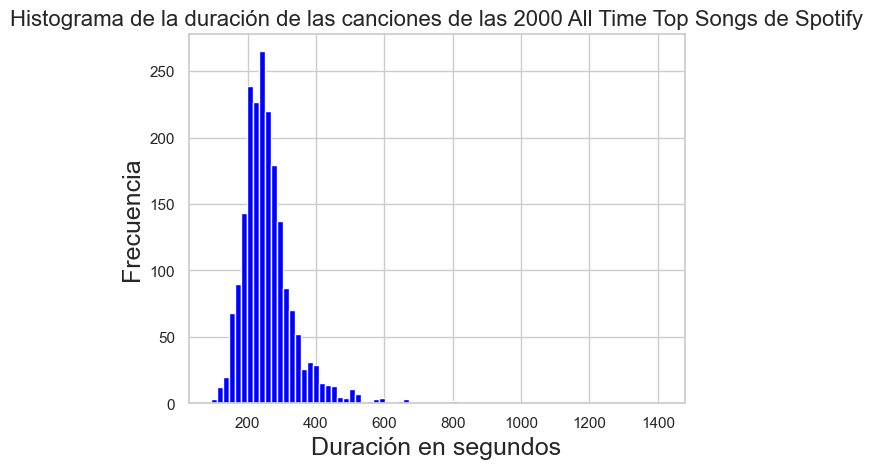

In [33]:
g = spotify_songs['Length (Duration)'].plot.hist(bins=75, color='blue')
g.set_title('Histograma de la duración de las canciones de las 2000 All Time Top Songs de Spotify', fontsize=16)
g.set_xlabel('Duración en segundos', fontsize=18)
g.set_ylabel('Frecuencia', fontsize=18)

__Density Plot__

Text(0, 0.5, 'Densidad')

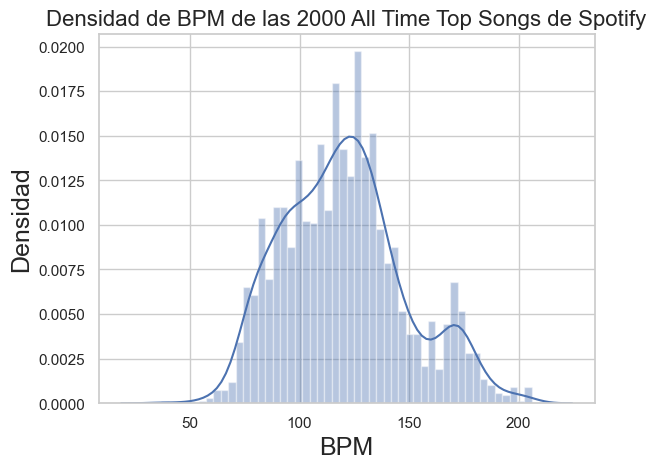

In [34]:
g = sns.distplot(spotify_songs['Beats Per Minute (BPM)'], bins=50, hist=True)
g.set_title('Densidad de BPM de las 2000 All Time Top Songs de Spotify', fontsize=16)
g.set_xlabel('BPM', fontsize=18)
g.set_ylabel('Densidad', fontsize=18)

Text(0, 0.5, 'Densidad')

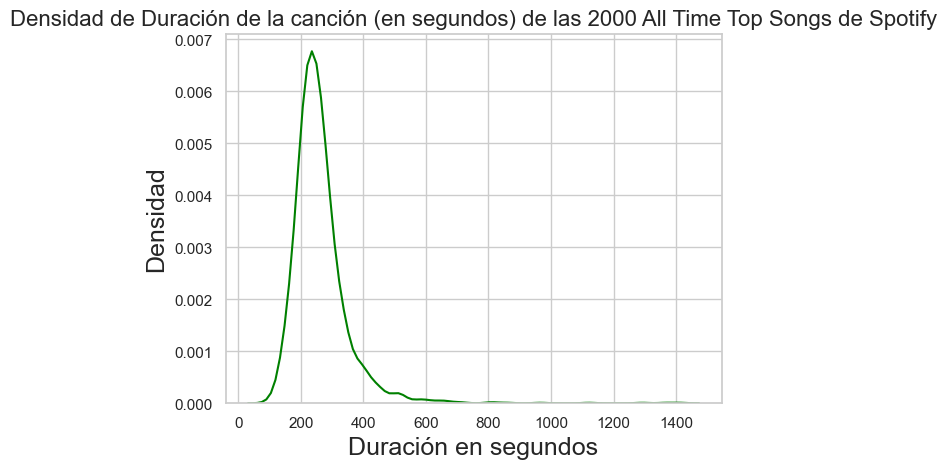

In [35]:
g = sns.distplot(spotify_songs['Length (Duration)'], color='green', hist=False)
g.set_title('Densidad de Duración de la canción (en segundos) de las 2000 All Time Top Songs de Spotify', fontsize=16)
g.set_xlabel('Duración en segundos', fontsize=18)
g.set_ylabel('Densidad', fontsize=18)

__Overlaid Histogras & Density Plots__

In [36]:
genre_counts = spotify_songs['Top Genre'].value_counts()
genre_counts[genres_counts > genres_counts.mean()]

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
dutch cabaret         51
classic rock          51
glam rock             49
modern rock           49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
dutch rock            18
disco                 18
neo mellow            17
glam metal            17
blues rock            15
alternative dance     15
art pop               14
Name: Top Genre, dtype: int64

Text(0, 0.5, 'Densidad')

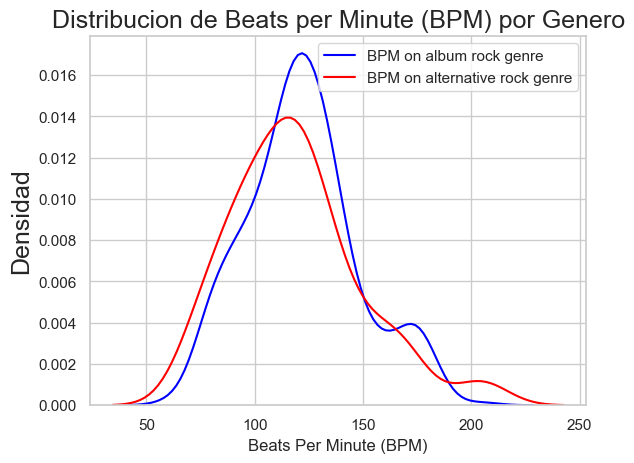

In [37]:
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]['Beats Per Minute (BPM)'], color="blue", label='BPM on album rock genre', hist=False)
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]['Beats Per Minute (BPM)'], color="red", label='BPM on alternative rock genre', hist=False)
g.set_title("Distribucion de Beats per Minute (BPM) por Genero", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

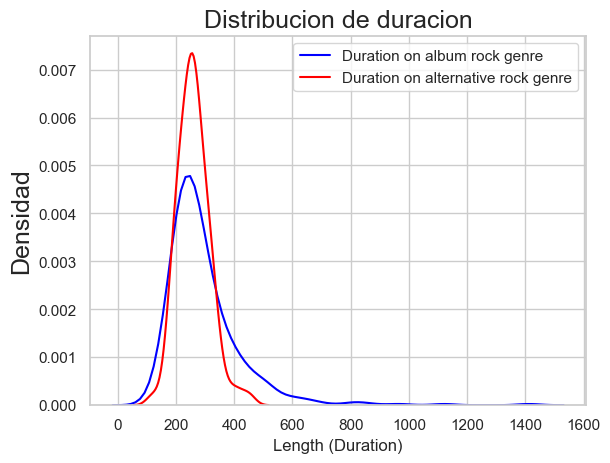

In [38]:
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]["Length (Duration)"], color="blue", label='Duration on album rock genre', hist=False)
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]["Length (Duration)"], color="red", label='Duration on alternative rock genre', hist=False)

g.set_title("Distribucion de duracion", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

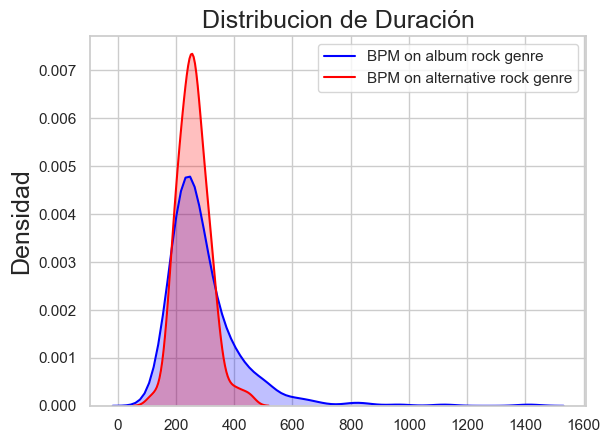

In [39]:
#KDE tiene el parámetro shade
g = sns.kdeplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]["Length (Duration)"], color="blue", label='BPM on album rock genre', shade=True)
g = sns.kdeplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]["Length (Duration)"], color="red", label='BPM on alternative rock genre', shade=True)

g.set_title("Distribucion de Duración", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

__Scatter Plot__

Text(0.5, 1.0, 'Energia vs. Beats Por Minuto (BPM)')

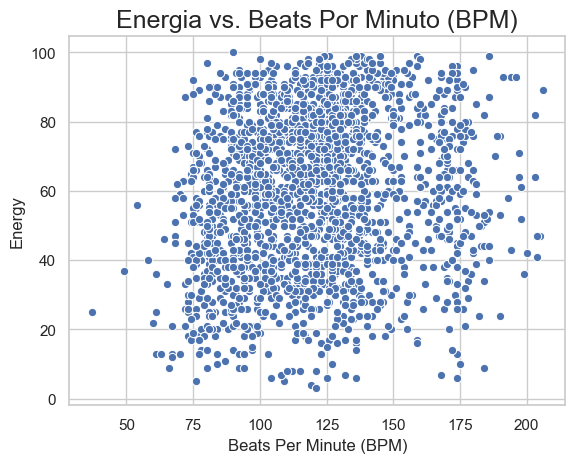

In [40]:
g = sns.scatterplot(x="Beats Per Minute (BPM)", y="Energy", data=spotify_songs)
g.set_title("Energia vs. Beats Por Minuto (BPM)", fontsize=18)

Text(0.5, 1.0, 'Popularidad vs. Beats Por Minuto (BPM)')

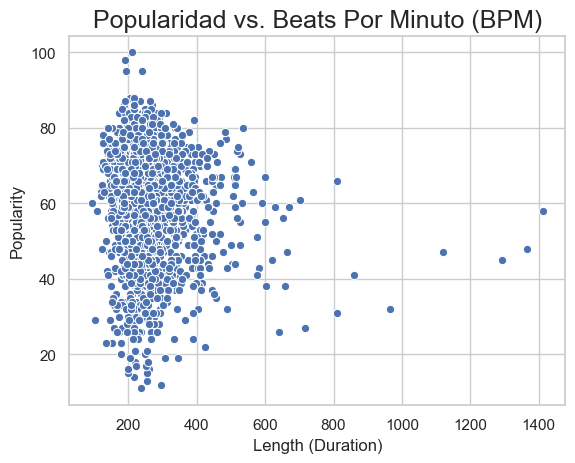

In [41]:
g = sns.scatterplot(x="Length (Duration)", y="Popularity", data=spotify_songs)
g.set_title("Popularidad vs. Beats Por Minuto (BPM)", fontsize=18)

In [42]:
beatles_stones_songs = spotify_songs[(spotify_songs['Artist'] == 'The Beatles') | (spotify_songs['Artist'] == 'The Rolling Stones')]
beatles_stones_songs

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
148,149,I Want To Hold Your Hand - Remastered 2015,The Beatles,british invasion,2000,131,72,49,-6,31,87,146,39,5,75
284,285,Lady Jane - (Original Single Mono Version),The Rolling Stones,album rock,2004,205,47,38,-12,9,31,190,34,5,34
307,308,Lady Madonna - Remastered 2015,The Beatles,british invasion,2000,110,78,65,-5,22,57,137,14,3,63
313,314,We Can Work It Out - Remastered 2015,The Beatles,british invasion,2000,106,68,38,-9,18,65,136,6,3,63
318,319,Hey Jude,The Beatles,british invasion,2006,74,63,46,-7,40,59,239,9,2,63
588,589,Yellow Submarine,The Beatles,british invasion,2014,111,64,62,-7,52,65,159,21,3,58
800,801,Let It Be - Remastered 2009,The Beatles,british invasion,1970,143,40,44,-8,11,41,243,63,3,79
813,814,The Long And Winding Road - Remastered 2009,The Beatles,british invasion,1970,132,33,30,-10,6,39,218,76,3,64
820,821,Get Back - Remastered 2009,The Beatles,british invasion,1970,123,59,76,-10,61,33,189,49,6,65
849,850,Wild Horses,The Rolling Stones,album rock,1971,140,39,43,-7,8,16,342,69,3,72


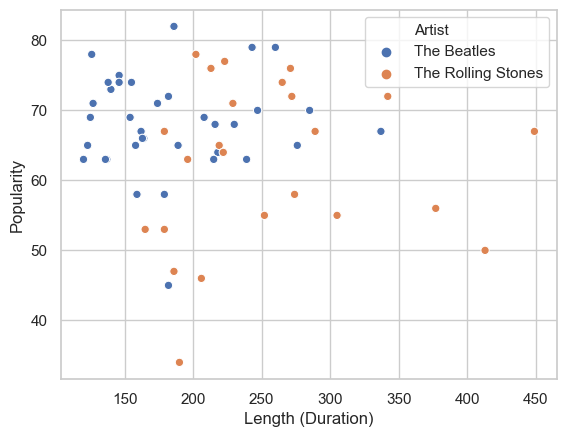

In [43]:
sns.scatterplot(x="Length (Duration)", y="Popularity", data=beatles_stones_songs, hue="Artist")

__Pairplot__

Solo sobre columnas numéricas

In [44]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [45]:
for_pairwise_analisis = spotify_songs[['Beats Per Minute (BPM)', 'Length (Duration)', 'Popularity']]

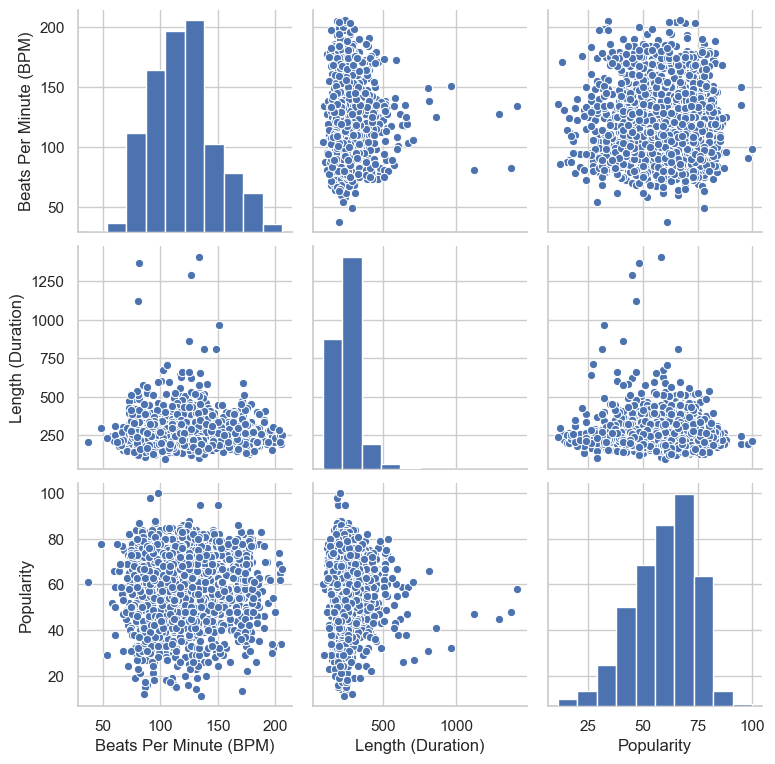

In [46]:
sns.pairplot(for_pairwise_analisis)

https://seaborn.pydata.org/tutorial/distributions.html

#### Análisis por Artista con mayor representación ####

In [47]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [48]:
spotify_songs['Artist'].value_counts()

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
                      ..
Manu Chao              1
Gloria Gaynor          1
Diesel                 1
Paul Kalkbrenner       1
Dido                   1
Name: Artist, Length: 731, dtype: int64

In [49]:
songs_by_main_artists = spotify_songs.groupby('Artist').filter(lambda x: len(x) >=24)

In [50]:
songs_by_main_artists

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
16,17,Speed of Sound,Coldplay,permanent wave,2005,123,90,52,-7,7,36,288,0,6,69
20,21,Fix You,Coldplay,permanent wave,2005,138,42,21,-9,11,12,296,16,3,81
30,31,The Scientist,Coldplay,permanent wave,2002,146,44,56,-7,11,21,310,73,2,84
37,38,The Saints Are Coming,U2,irish rock,2006,152,81,32,-7,15,12,202,8,5,40
56,57,Sometimes You Can't Make It On Your Own,U2,irish rock,2004,96,60,53,-6,11,35,305,0,2,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,1950,Gimme Shelter,The Rolling Stones,album rock,1969,119,63,63,-8,17,49,271,45,3,76
1956,1957,You Can't Always Get What You Want,The Rolling Stones,album rock,1969,86,62,32,-10,25,47,449,64,6,67
1959,1960,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79
1960,1961,Something - Remastered 2009,The Beatles,british invasion,1969,134,34,40,-11,14,38,182,20,3,72


In [51]:
print("Calculando la media de los artistas mas frecuentes en el set de datos:")
print(round(songs_by_main_artists.groupby(["Artist"])["Beats Per Minute (BPM)", "Length (Duration)"].mean(),2))

Calculando la media de los artistas mas frecuentes en el set de datos:
                    Beats Per Minute (BPM)    Length (Duration)
Artist                                                         
Coldplay                            127.00               274.78
Queen                               103.30               250.70
The Beatles                         119.22               184.58
The Rolling Stones                  118.21               254.92
U2                                  127.00               273.81


In [52]:
print("Calculando el desvio de los artistas mas frecuentes en el set de datos")
print(round(songs_by_main_artists.groupby(["Artist"])["Beats Per Minute (BPM)", "Length (Duration)"].std(),2))

Calculando el desvio de los artistas mas frecuentes en el set de datos
                    Beats Per Minute (BPM)    Length (Duration)
Artist                                                         
Coldplay                             25.76                40.34
Queen                                26.22                58.47
The Beatles                          27.25                52.93
The Rolling Stones                   27.77                76.02
U2                                   25.74                49.43


__Boxplot__

https://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0, 0.5, 'BPM')

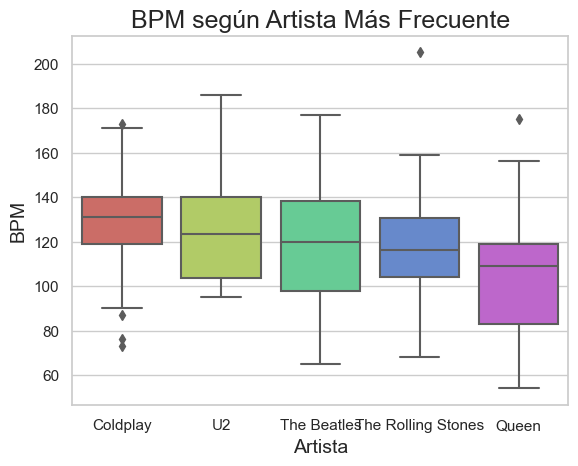

In [53]:
g = sns.boxplot(x="Artist", y="Beats Per Minute (BPM)", 
                     data=songs_by_main_artists, palette="hls")
g.set_title("BPM según Artista Más Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("BPM", fontsize=14)

Text(0, 0.5, 'Length (Duration)')

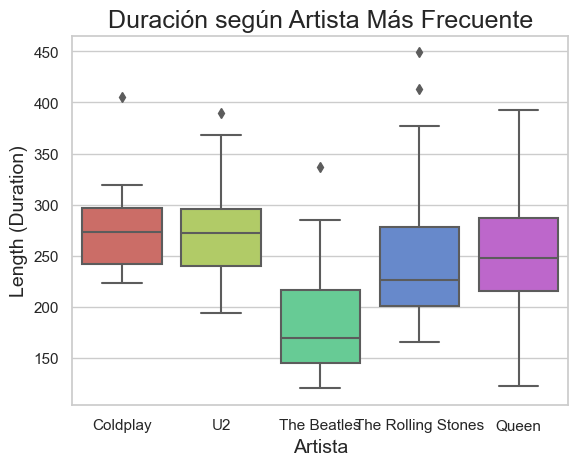

In [54]:
g = sns.boxplot(x="Artist", y="Length (Duration)", 
                     data=songs_by_main_artists, palette="hls")
g.set_title("Duración según Artista Más Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("Length (Duration)", fontsize=14)

* Géneros con mayor cantidad de canciones

In [55]:
main_genres_counts = spotify_songs["Top Genre"].value_counts()
main_genres_counts

album rock          413
adult standards     123
dutch pop            88
alternative rock     86
dance pop            83
                   ... 
bebop                 1
pop punk              1
diva house            1
la pop                1
happy hardcore        1
Name: Top Genre, Length: 149, dtype: int64

In [56]:
main_genres_counts = main_genres_counts[main_genres_counts > main_genres_counts.mean()]
main_genres_counts

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
dutch cabaret         51
classic rock          51
glam rock             49
modern rock           49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
dutch rock            18
disco                 18
neo mellow            17
glam metal            17
blues rock            15
alternative dance     15
art pop               14
Name: Top Genre, dtype: int64

__Bar Plot__

https://seaborn.pydata.org/generated/seaborn.barplot.html

Text(0, 0.5, 'Genero')

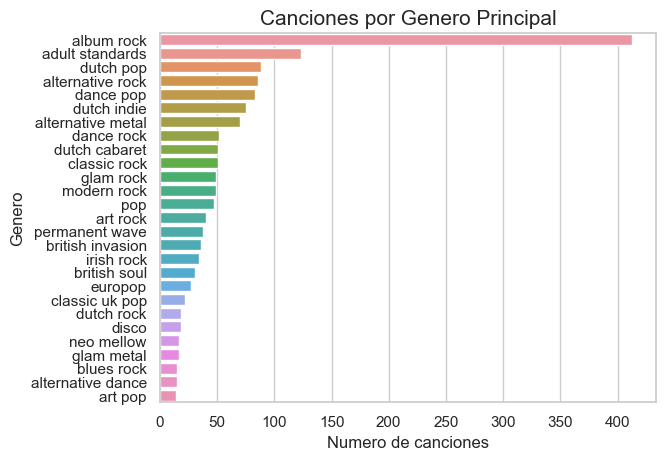

In [57]:
g = sns.barplot(x=main_genres_counts.values, y=main_genres_counts.index, orient='h')
g.set_title("Canciones por Genero Principal", fontsize=15)
g.set_xlabel("Numero de canciones", fontsize=12)
g.set_ylabel("Genero", fontsize=12)